# Seawater Salinity Lab 

## Introduction
This lab will show you how to use a Jupyter Notebook to create a calibration curve, evaluate the goodness of the curve, and predict a value.

To proceed through this tutorial, click the Run button for each cell as you procede sequentially through this notebook. You can also type control+shift to run each cell.

To prepare your data for analysis, put it in a spreadsheet and save as a .csv file.

We start out by importing some popular data analysis and statistics and plotting libraries that are in nanoHUB

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
# Import the data- which is a file called "salinity.csv" that must be in the same folder as this notebook.
# and put this data into a dataframe called calibration
calibration = pd.read_csv('salinity.csv')

In [4]:
# display the dataframe by typing its name
calibration

,solution,mass_pct,density
0,1,20.00,1.100
1,2,10.00,1.053
2,3,5.00,1.029
3,4,2.50,1.012
4,5,1.25,1.006


You can see that the columns are named salinity, mass_pct and density.  
Next, we will plot this data using the extension .plot on the name of the dataframe.
First, specify what is going to be plotted, then provide information on how to format the title and axes.
This uses some features from matplotlib.  .title,  .xlabel, .ylabel

Text(0, 0.5, 'Mass % (g NaCl/g soln)')

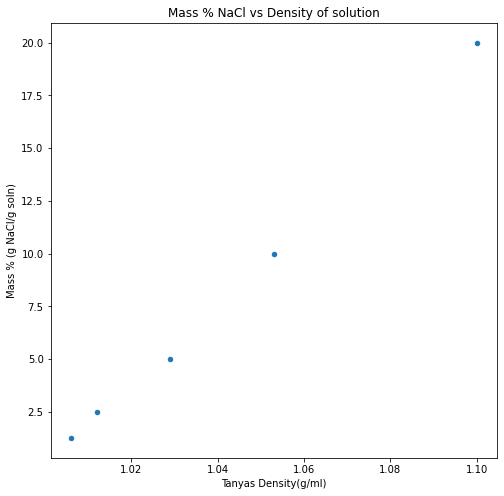

In [5]:
calibration.plot(x ='density', y='mass_pct', kind = 'scatter', figsize = (8,8))
plt.title("Mass % NaCl vs Density of solution")
plt.xlabel('Tanyas Density(g/ml)')
plt.ylabel('Mass % (g NaCl/g soln)')

Now, let's fit a straight line to this curve using linear regression from a package called statsmodels

https://www.statsmodels.org/stable/index.html

import the package

In [6]:
import statsmodels.formula.api as smf

In [7]:
model = smf.ols('mass_pct ~ density', data=calibration) # .ols is ordinary least squares 
model = model.fit()

In [8]:
# .summary shows many details about this curve fit
# model.summary()

The model is a straight line with the equation y = mx + b

where 
b is the y-intercept
m is the slope
x is the independent variable 
y is the dependent variable.

The values of m and b are in the above output:

m = density
b = intercept 

To display just these two values, type model.params

In [9]:
model.params

Intercept   -199.625643
density      199.399657
dtype: float64

<bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x7fd2e68edc10>>

Now, let's plot the straight line and the data

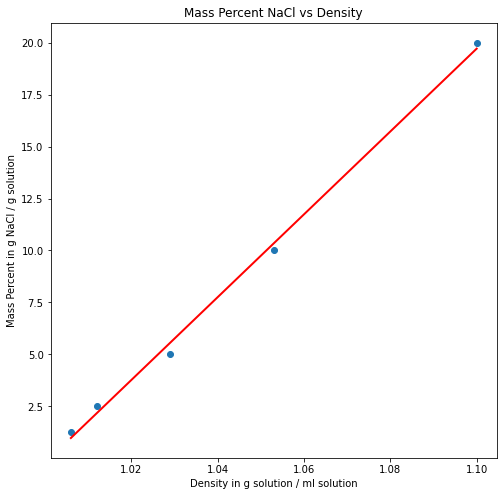

In [12]:
# Predict values
density_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(8, 8))
plt.plot(calibration['density'], calibration['mass_pct'], 'o')     # scatter plot showing actual data
plt.plot(calibration['density'], density_pred, 'r', linewidth=2)   # regression line is red
plt.ylabel('Mass Percent in g NaCl / g solution')
plt.xlabel('Density in g solution / ml solution')
plt.title('Mass Percent NaCl vs Density')

plt.show()

If you know the density of a solution and want to find the Mass Percent NaCl, you can use the following function:

In [ ]:
# this predicts the mass percent given a density (that is the new_d variable below.  You can edit that number)
new_d_text = input('Enter new Density and press return or enter:\n')  # you will get to enter the value, even though you enter a number, it will be categorized as "text"
new_d = float(new_d_text)  #convert the text to a floating point number, so that it can be used in calculations
# new_d = 1.03      # new_d is the name of the variable, 1.03 is the density you are entering.  Maybe 
# we can ask for this!

masspct= model.predict({"density": new_d})

In [ ]:
masspct

In [ ]:


print("The mass percent is",masspct[1] )

The second value, after the 0, is the mass percent of a solution with the density you entered -- as predicted by the calibration curve.
If you typed in 1.03, the solution is 5.756 mass percent NaCl.

You can add cells to this notebook to calculate the molarity (M) from the mass percent.
